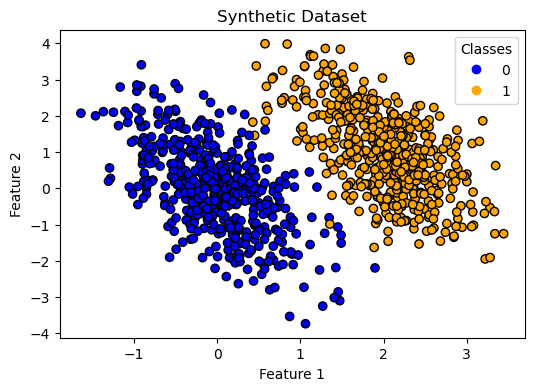

In [2]:
# Create 2 slightly overlapping blobs and plot them
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from typing import *
from outlier_generation import generate_artificial_outliers

from sklearn.datasets import make_blobs

centers = [[0, 0], [5, 0]]
X, y = make_blobs(n_samples=1_000, centers=centers, random_state=0)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

fig, ax = plt.subplots(figsize=(6, 4))

cmap = ListedColormap(["blue", "orange"])
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="black")

ax.set(title="Synthetic Dataset", xlabel="Feature 1", ylabel="Feature 2")
_ = ax.legend(*scatter.legend_elements(), title="Classes")

In [3]:
# Fit a logistic regression
from sklearn.linear_model import LogisticRegression

logistic_regression_multinomial = LogisticRegression().fit(X, y)

accuracy_multinomial = logistic_regression_multinomial.score(X, y)

In [4]:
# epsilon is the minimum
# alpha is how wild we are with it
# probably makes sense to vary alpha only, if we do it at all? hard to tell ahead of time though: scale both up accordingly?

# Create 100 outliers FOR EACH CLASS
n_art_0 = 100
n_art_1 = 100

alpha = 1.0
epsilon = 0.25

X_art_0 = generate_artificial_outliers(X[y==0], n_art = n_art_0, alpha = alpha, epsilon = epsilon)
y_art_0 = np.zeros((n_art_0,))

X_art_1 = generate_artificial_outliers(X[y==1], n_art = n_art_1, alpha = alpha, epsilon = epsilon)
y_art_1 = np.ones((n_art_1,))

X_art = np.vstack((X_art_0, X_art_1))
y_art = np.concatenate((y_art_0, y_art_1))


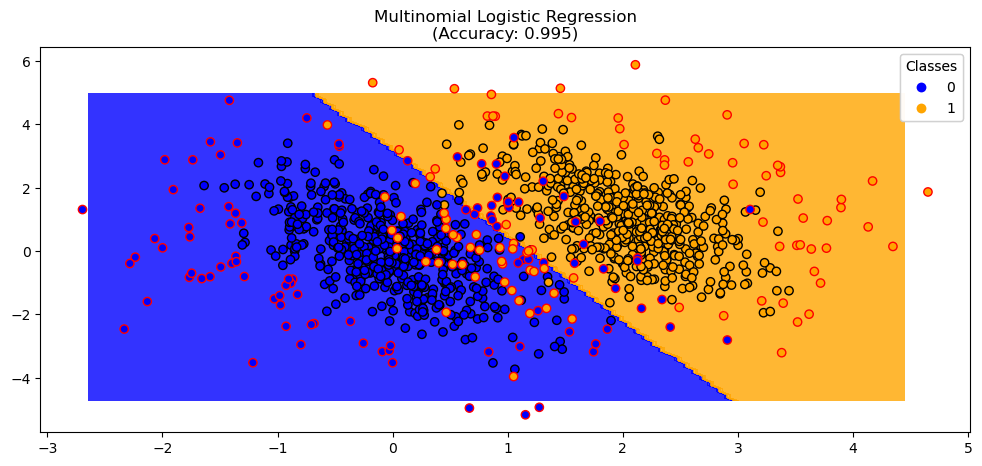

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax1 = plt.subplots(1, 1, figsize=(12, 5), sharex=True, sharey=True)

for model, title, ax in [
    (
        logistic_regression_multinomial,
        f"Multinomial Logistic Regression\n(Accuracy: {accuracy_multinomial:.3f})",
        ax1,
    )
]:
    DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        ax=ax,
        response_method="predict",
        alpha=0.8,
        cmap=cmap
    )
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="black")

    ax1.scatter(X_art[:, 0], X_art[:, 1], c=y_art, cmap=cmap, edgecolor="red")      # Plot the artificial points

    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_title(title)